# Logistic Regression Basics - 

* Generally used for Binary (or Binomial) Classification. But can be used for Multiclass (or Multinomial) Classification as well
* LR is a linear classifier.  𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the logit
            where, f(x) : Linear function
         [x1,x2,x3....] : Input vector
         [b0,b1,b2....] : Weights (or Estimator or Coefficients)
* Logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 
            𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱))
                          
* During model training, we update [b0,b1,b2....] such that we maximise Log Likelihood functions
            LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ)))
            
            
            
NOTE - Source and Credits : https://realpython.com/logistic-regression-python/

# Classification Performance

True negatives: correctly predicted negatives (zeros)
True positives: correctly predicted positives (ones)
False negatives: incorrectly predicted negatives (zeros)
False positives: incorrectly predicted positives (ones)
    

The most straightforward indicator of classification accuracy is the ratio of the number of correct predictions to the total number of predictions (or observations). Other indicators of binary classifiers include the following:

Positive predictive value : ratio of the number of true positives to the sum of the numbers of true and false positives.
Negative predictive value : ratio of the number of true negatives to the sum of the numbers of true and false negatives.
Sensitivity (recall or true positive rate) : ratio of the number of true positives to the number of actual positives.
Specificity (true negative rate) : ratio of the number of true negatives to the number of actual negatives.

# Example 1 - Single Variate Binary Classification

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#Create dummy data
x = np.arange(10).reshape(-1,1) #reshape converts array to column vector
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) #manually given labels

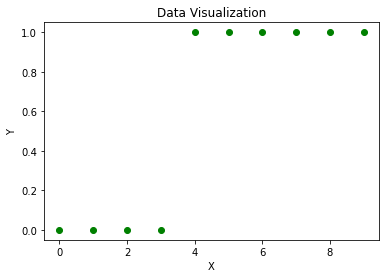

In [14]:
#Visualize the data
plt.title("Data Visualization")  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.plot(x, y, 'o', color ="g")  
plt.show()

In [9]:
#Create Model
model = LogisticRegression(solver='liblinear', random_state=0)

#Once instance of Class Logistic Regression is created, we need to fit it on our data
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [11]:
#Various attributes of the model
#     - model.classes_ : Gives all the classes in y
#     - model.intercept_ : Gives the intercept of the linear function
#     - model.coef_ : Gives the slope of the linear function
model.classes_, model.intercept_, model.coef_

(array([0, 1]), array([-1.04608067]), array([[0.51491375]]))

In [15]:
#Model Performance
model.predict_proba(x)

#This gives an array of [p[0], p[1]] for the training data. 
#Can clearly see if we keep threshold = 0.5, first 3 records are classified as 0 and rest 7 as 1. Something is not right

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [16]:
#Easier way to do this - 
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

#### MODEL EVALUATION

In [19]:
model.score(x, y)

0.9

In [26]:
confusion_matrix(y, model.predict(x)) #Special attention to placement of y and model.predict


# The result of this tells the following - 
#         TP : 3
#         TN : 6
#         FP : 1
#         FN : 0
# This is what we can understand from model.predict as well. One of the labels is falsely classified as 1 instead of 0

array([[3, 1],
       [0, 6]], dtype=int64)

In [29]:
#Create Classification Report - Gives Precision, Recall and F1 score
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [ ]:
#Few final comments about the above exercise - 
# 1. Basic implementation of Logistic Regression. A lot of parameters in LogisticRegression can be tweaked to get better results
# 2. Testing should ideally be done on unseen data - Train, Test split. Again, it's just an illustration

# Example 2 - Handwriting Recognition

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
# Get the data
x, y = load_digits(return_X_y=True)
x.shape, y.shape

In [34]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [35]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
#Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Standardization

Since the data in X is numeric, outside the range [-1,1] or even [1,10], it's a good idea to look into standardization
Standardization is the process of transforming an array such that :

        1.Column Mean = 0
        2.Column Std Dev = 1


Steps for standardization - 

    1. Calculate the mean and standard deviation for each column.
    2. Subtract the corresponding mean from each element.
    3. Divide the obtained difference by the corresponding standard deviation.

In [38]:
#Instantiate StandardScaler class and call fit_transform to standardize

scaler = StandardScaler()
x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)

In [39]:
#Instantiate LogisticRegression Class and fit the data

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [40]:
#Model Attributes
model.classes_, model.intercept_, model.coef_

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([-2.73645761, -2.77774361, -2.74028598, -2.72221436, -2.70234208,
        -2.7232237 , -2.79949725, -2.74590013, -2.63851341, -2.75679358]),
 array([[ 0.00000000e+00, -2.27680531e-02, -1.05198103e-02,
          1.49272422e-01, -8.08210879e-02, -2.49747653e-01,
         -5.14325206e-02, -5.45056683e-03, -2.32032737e-03,
         -1.25447504e-01,  3.24463204e-02,  1.02987845e-01,
          3.08882350e-01,  3.10625812e-01, -4.08016176e-02,
         -1.34743379e-02,  1.08159828e-02,  7.79920142e-02,
         -2.55957154e-02, -7.22962220e-03, -1.66787374e-01,
          3.37966750e-01,  5.94210751e-02, -2.43160281e-02,
          1.77634770e-02,  1.80673248e-01,  9.67450831e-03,
         -2.68433227e-01, -4.95389929e-01, -1.28902641e-01,
          1.70026784e-01, -2.89743863e-03,  0.00000000e+00,
          1.45614546e-01,  1.70908304e-01, -3.15761191e-01,
         -3.69687449e-01, -1.86967353e-01,  1.56212150e-01,
          0.00000000e+00, -1.932

In [41]:
#Predictions
y_pred = model.predict(x_test)

In [44]:
print("Training Accuracy : ",model.score(x_train, y_train))
print("Testing Accuracy : ", model.score(x_test, y_test))

Training Accuracy :  0.964509394572025
Testing Accuracy :  0.95


In [47]:
print(confusion_matrix(y_test, y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  1]
 [ 2  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  2  0  0  0  0 34  0]
 [ 0  0  0  1  0  1  0  2  1 36]]


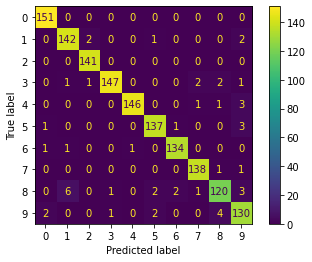

In [50]:
plot_confusion_matrix(model, x_test, y_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.92      0.94      0.93        35
           2       0.94      0.94      0.94        36
           3       0.90      0.97      0.93        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       0.95      0.88      0.91        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

